# Wine data - Clustering

##Goal: 
Discover the optimal number of customer segments to focus on based on the features of various types of wine. (Note: the dataset already comes with a variable named Customer_Segment which has 3 segments/clusters. This is useful for building a model which can be applied to the segmentation of future customers.)

 
###Part 1: K-Mean Clustering

Uses the KMeans() class from the sklearn.cluster module.  

Finds the optimal number of clusters using both the Elbow method and the Silhouette method.

###Part 2:  Hierarchical Clustering

Uses the AgglomerativeClustering() class from sklearn.cluster module.  

Plots the dendrogram. Identification of the optimal number of clusters.

###Part 3: Model Comparison

Uses the rand_score function from sklearn.metrics to compare the performances of the clustering models with respect to the true customer segments.

In [2]:
from pandas.core.common import random_state
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

rand_state = 1000

In [3]:
#Read in the data
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/fall22/data/Wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Customer_Segment variable was dropped for analysis. The variable will be used to score the models at the end of the assessment.

In [4]:
X = df.drop('Customer_Segment', axis=1, inplace =False)

# **Part 1**

In [5]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = sc.fit_transform(df)

In [6]:
WCSS=[]
silhouette_scores = [] 
K= 15
for i in range(2,K+1): 
    kmeans= KMeans(n_clusters=i, random_state=100)
    kmeans.fit(df_sc)
    WCSS.append(kmeans.inertia_) 
    scores = silhouette_score(df_sc, kmeans.labels_)
    silhouette_scores.append(scores)
  
optimal_k = pd.DataFrame({'K':range(2,K+1), 'WCSS':WCSS, 'silhouette_score':silhouette_scores})
optimal_k


,K,WCSS,silhouette_score
0,2,1727.228661,0.286167
1,3,1285.562259,0.307736
2,4,1182.764962,0.274552
3,5,1127.410490,0.215733
4,6,1057.711543,0.243086
5,7,1010.021889,0.171919
6,8,943.715246,0.203304
7,9,900.827883,0.143899
8,10,875.812465,0.133236
9,11,840.888593,0.141771


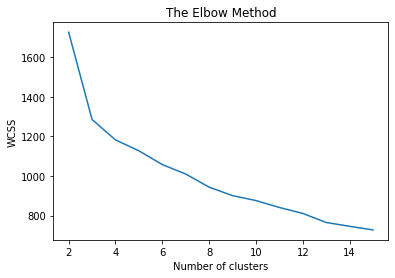

In [7]:
sns.lineplot(x='K', y='WCSS', data=  optimal_k)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

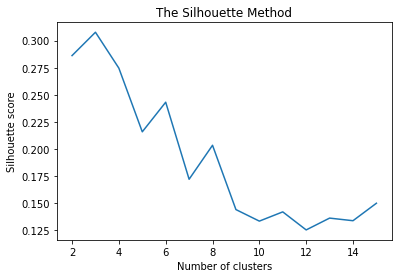

In [8]:
sns.lineplot(x='K', y='silhouette_score', data=  optimal_k)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


From the elbow method and the silhouette score it seems that the optimal number of clusters is k = 3. The elbow method shows that improvement slows dramatically after k = 3. The silhouette method agrees that 3 is the best value for k.

In [ ]:
kmeans_label = KMeans(n_clusters=3, random_state=100).fit_predict(df_sc)

# **Part 2**

In [ ]:
import scipy.cluster.hierarchy as sch

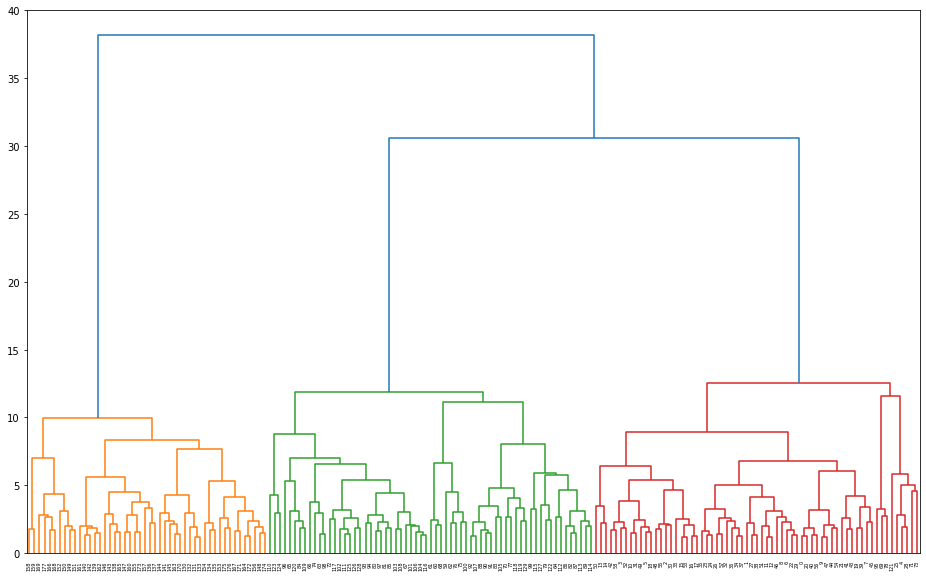

In [ ]:
plt.figure(figsize=(16,10))
dend = sch.dendrogram(sch.linkage(df_sc,method='ward'))

The optimal number of clusters appears to be three. The height of the lines in the yellow, green, and red sections are short, representing that categories within these groups are differentiable but not very different. The height of the blue dendrites shows how different each of these three groups are.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hierarchical_labels = hc.fit_predict(df_sc)

# **Part 3**

In [ ]:
rand_score(kmeans_label, df['Customer_Segment'])

0.9763854503904018

In [ ]:
from sklearn.metrics import rand_score
rand_score(hierarchical_labels, df['Customer_Segment'])

0.9527709007808036

# Which Model is the Best? 
The k-means classification model has 97% accuracy. This is higher than the hierarchical model's 95% accuracy score.

Each of these models might be improved with the use of additional methods which can be used within or alongside each classification model, but the simple models shown here are compared as provided.
